# Graphiques concernant les couples phages-bactérie de la DB

Résumé : Réalisation de graphiques permettant de montrer la répartition des bactéries en fonction de la taxonomie. Souches (Strains), Espèces (Species), Genres (Genus) et Familles (Families)

Les bactéries sont exclusivement celles prises des couples phage-bactérie obtenues à l'aide de la fonction getAllCouple(). 

In [21]:
import matplotlib.pyplot as plt

from configuration.configuration_api import ConfigurationAPI
from rest_client.AuthenticationRest import AuthenticationAPI

from objects_API.CoupleJ import CoupleJson
from objects_API.BacteriumJ import BacteriumJson
from objects_API.StrainJ import StrainJson
from objects_API.SpecieJ import SpecieJson
from objects_API.GenusJ import GenusJson
from objects_API.FamilyJ import FamilyJson
from objects_API.ProteinJ import ProteinJson
from objects_API.OrganismJ import OrganismJson
from objects_API.SourceDataJ import SourceDataJson
 

conf_obj = ConfigurationAPI()
conf_obj.load_data_from_ini()
AuthenticationAPI().createAutenthicationToken();

In [2]:
def getAllOfCouples():
        list_couples = CoupleJson.getAllAPI()
        return list_couples

def getAllOfStrain():
        list_strain = StrainJson.getAllAPI()
        return list_strain

def getAllOfGenus():
        list_genus = GenusJson.getAllAPI()
        return list_genus

def getAllOfFamily():
        list_family = FamilyJson.getAllAPI()
        return list_family

In [14]:
#for the plot
data_name  = []
data_value = []

print("Bacterium")
list_of_couples = getAllOfCouples()

#dictionnary bacterie_id : number of this bacterie in all couples
bact_dic = {}

for couple in list_of_couples:
        #check if there is already the id of the bacterium in the dictionnary
        if not couple.bacterium in bact_dic.keys():
                #add the key-value : bacterie_id - number of this bacterie
                bact_dic[couple.bacterium] = 0
        #increase de number of the bacterie who has this id
        bact_dic[couple.bacterium] += 1

Bacterium


## Graphe 1 - Répartition des bactéries selon les souches

Strain


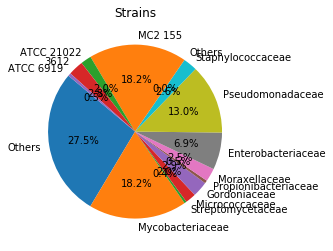

In [13]:
print("Strain")

#dictionnary strain_name : number of bacteries in this strain
strain_dic = {}

for bact_id in bact_dic.keys():
        #get the strain designation from the bacterie
        strain_id = BacteriumJson.getByID(bact_id).strain
        if not strain_id in strain_dic:
                #add the object strain in the dictionnary
                strain_dic[strain_id] = 0
        #add the number of the bacteries to the specific strain
        strain_dic[strain_id] += bact_dic[bact_id]

#For the plot
data_name.append('Others')
data_value.append(0)

for strain in strain_dic:
        #keep only strain with more than 50 bacteries
        if(strain_dic[strain] > 50):
                data_name.append(StrainJson.getByID(strain).designation)
                data_value.append(strain_dic[strain])
        else:
                #add the value to the section 'Others'
                data_value[0] += strain_dic[strain]
        
#display plot
fig_1, axs = plt.subplots(1,1)
plt.title("Strains")
plt.pie(data_value, labels=data_name, autopct='%1.1f%%', startangle=140);

## Graphe 2 - Répartition des bactéries selon les espèces 

Species


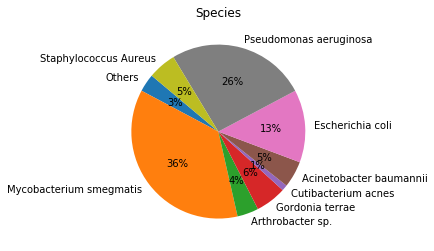

In [24]:
print("Species")

specie_dic = {}

for strain_id in strain_dic:
        #get the specie designation from the strain
        specie_id = StrainJson.getByID(strain_id).specie
        if not specie_id in specie_dic:
                #add the object specie in the dictionnary
                specie_dic[specie_id] = 0
        #add the number of the bacteries to the specific specie
        specie_dic[specie_id] += strain_dic[strain_id]

#For the plot
fig_2, axs = plt.subplots(1,1)
#reset
data_name = []
data_value = []
data_name.append('Others')
data_value.append(0)

for specie in specie_dic:
        #keep only specie with more than 50 strain
        if(specie_dic[specie] > 50):
                data_name.append(SpecieJson.getByID(specie).designation)
                data_value.append(specie_dic[specie])
        else:
                #add the value to the section 'Others'
                data_value[0] += specie_dic[specie]
  
#display plot
plt.title("Species")
plt.pie(data_value, labels=data_name, autopct='%1.0f%%', startangle=140);

## Graphe 3 - Répartition des bactéries selon les genres 
Note : La classe GenusJ ne disposant pas des fonctions getByID(), j'ai créé une liste de correspondance afin d'avoir accès à tous les genres disponibles. 

Genus


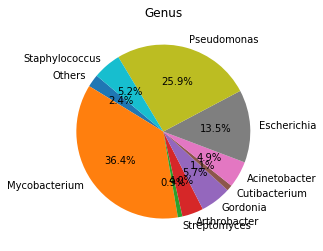

In [10]:
genus_dic = {}
genus_list = getAllOfGenus()
genus_dic_list = []

for specie_id in specie_dic:
        #get the genus id from the strain
        genus_id = SpecieJson.getByID(specie_id).genus
        if not genus_id in genus_dic:
                for genus in genus_list:
                        if genus.id == genus_id:
                                #add the genus id in the dictionnary
                                genus_dic[genus_id] = 0
                                #add the genus object in the list
                                genus_dic_list.append(genus)
        #add the number of the species to the specific genus
        genus_dic[genus_id] += specie_dic[specie_id]

#For the plot
fig_3, axs = plt.subplots(1,1)
#reset
data_name = []
data_value = []
data_name.append('Others')
data_value.append(0)

for genus_id in genus_dic:
        
        if(genus_dic[genus_id] > 50):
                data_name.append(genus_dic_list[list(genus_dic.keys()).index(genus_id)].designation)
                data_value.append(genus_dic[genus_id])
        else:
                #add the value to the section 'Others'
                data_value[0] += genus_dic[genus_id]
  
#display plot
plt.title("Genus")
plt.pie(data_value, labels=data_name, autopct='%1.1f%%', startangle=140);


## Graphe 4 - Répartition des bactéries selon les familles 
Note : La classe FamilyJ ne disposant pas des fonctions getByID(), j'ai créé une liste de correspondance afin d'avoir accès à tous les genres disponibles. 

Family


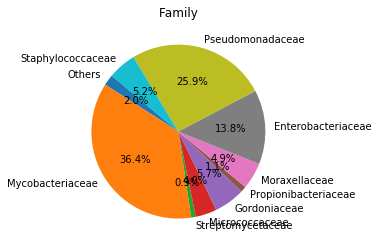

In [15]:

print("Family")

family_dic = {}
family_list = getAllOfFamily()
family_dic_list = []

for genus_id in genus_dic:
        #get the family id from the genus
        for genus in genus_dic_list:
                if genus_id == genus.id:
                        family_id = genus.family
                        break
        
        if not family_id in family_dic:
                for family in family_list:
                        if family.id == family_id:
                                #add the family id in the dictionnary
                                family_dic[family_id] = 0
                                #add the family object in the list
                                family_dic_list.append(family)
        #add the number of the species to the specific genus
        family_dic[family_id] += genus_dic[genus_id]

#For the plot
fig_4, axs = plt.subplots(1,1)
#reset
data_name = []
data_value = []
data_name.append('Others')
data_value.append(0)

for family_id in family_dic:
        
        if(family_dic[family_id] > 50):
                data_name.append(family_dic_list[list(family_dic.keys()).index(family_id)].designation)
                data_value.append(family_dic[family_id])
        else:
                #add the value to the section 'Others'
                data_value[0] += family_dic[family_id]
  
#display plot
plt.title("Family")
plt.pie(data_value, labels=data_name, autopct='%1.1f%%', startangle=140);


### Graphe 5- Nombre et noms des protéines des bactéries présentent dans les couples

In [31]:
list_couple = CoupleJson.getAllAPI()
list_oragnism = []
protein_list = []
protein_dic = {}

#get bacteries
for couple in CoupleJson.getAllAPI():
    if not couple.bacterium in list_oragnism:
        list_oragnism.append(couple.bacterium)
    
'''for organism_id in list_oragnism:
    protein_list = ProteinJson.getByOrganismID(organism_id)
    for protein in protein_list:
        if not protein.description in protein_dic.keys():
            protein_dic[protein.description] = 0
        protein_dic[protein.description] += 1''';


### Graphe 6 - D'où les couples proviennent

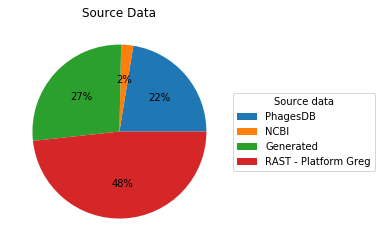

In [27]:
data_name = []
data_values = []

source_data_dic = {}
list_source_data = SourceDataJson.getAllAPI()

for couple in list_couple:
    if not couple.source_data in source_data_dic.keys():
        source_data_dic[couple.source_data] = 0
    source_data_dic[couple.source_data] += 1

for source_data_id in source_data_dic.keys():
    for source in list_source_data:
        if source.id == source_data_id:
            data_name.append(source.designation)
            data_values.append(source_data_dic[source_data_id])


#plot
fig_1, axs = plt.subplots()
axs.set_title("Source Data")
wedges, texts, autotexts = axs.pie(data_values, autopct='%.0f%%')
axs.legend(wedges, data_name,
          title="Source data",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()